### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [3]:
import tensorflow as tf
tf.set_random_seed(42)

In [4]:
tf.__version__

'1.14.0'

### Collect Data

In [5]:
import keras

Using TensorFlow backend.


In [6]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 3s 1us/step


In [7]:
trainX.shape

(60000, 28, 28)

In [8]:
testY.view()

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [9]:
trainY = tf.keras.utils.to_categorical(trainY,num_classes=10)

In [10]:
testY = tf.keras.utils.to_categorical(testY,num_classes=10)

#### Expected Output should look like this

In [11]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000, 10)
First 5 examples now are:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


### Visualize the data

Plot first 10 images in the triaining set and their labels.

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

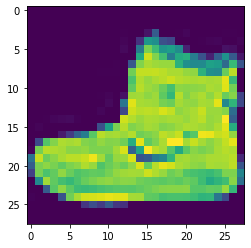

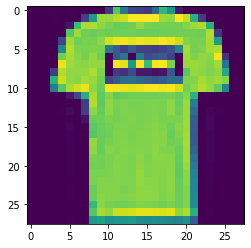

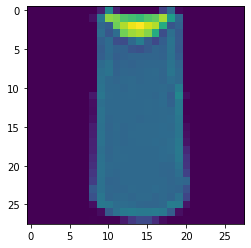

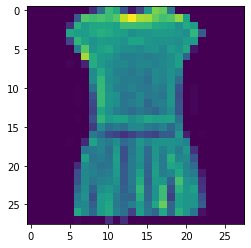

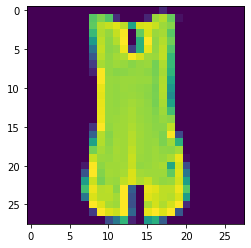

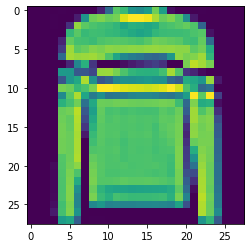

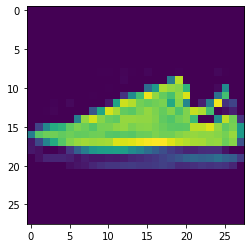

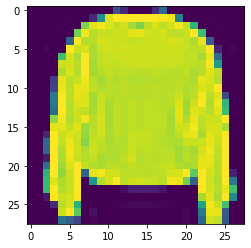

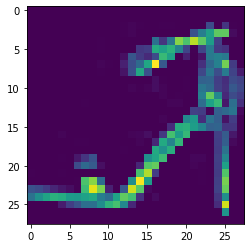

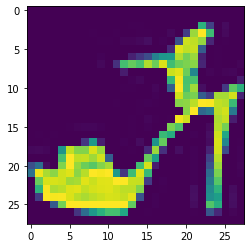

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
for i in range(10):
    image = trainX[i]
    plt.figure(i)
    plt.imshow(image)
#### Expected Output

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [13]:
#Initialize sequential model
model = tf.keras.models.Sequential()

In [14]:
#Reshape data from 2D to 1D -> 28 X 28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

In [15]:
#Add Dense Layer which provides 10 outputs after applying softmax
model.add(tf.keras.layers.Dense(10,activation='softmax'))

W0814 22:47:28.483041 139728905389888 deprecation.py:506] From /home/jd/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [16]:
#Complie the model
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

### Execute the model using model.fit()

In [17]:
model.fit(trainX,trainY,epochs=10,validation_data=(testX,testY),batch_size=trainX.shape[0])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 14us/sample - loss: 243.8430 - acc: 0.0538 - val_loss: 4236.4487 - val_acc: 0.2033
Epoch 2/10
60000/60000 [==============================] - 0s 3us/sample - loss: 4227.7222 - acc: 0.2084 - val_loss: 9876.5684 - val_acc: 0.1811
Epoch 3/10
60000/60000 [==============================] - 0s 3us/sample - loss: 9811.1318 - acc: 0.1815 - val_loss: 14353.8223 - val_acc: 0.2391
Epoch 4/10
60000/60000 [==============================] - 0s 3us/sample - loss: 14240.5479 - acc: 0.2439 - val_loss: 18444.3574 - val_acc: 0.2859
Epoch 5/10
60000/60000 [==============================] - 0s 3us/sample - loss: 18374.1133 - acc: 0.2892 - val_loss: 14153.8564 - val_acc: 0.2687
Epoch 6/10
60000/60000 [==============================] - 0s 3us/sample - loss: 14100.5732 - acc: 0.2694 - val_loss: 13631.3184 - val_acc: 0.2873
Epoch 7/10
60000/60000 [==============================] - 0s 3us/sample - loss:

### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [18]:
#Initialize sequential model
model = tf.keras.models.Sequential()

In [19]:
#Reshape data from 2D to 1D -> 28 X 28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

In [20]:
#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

In [21]:
#Add Dense Layer which provides 10 outputs after applying softmax
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [22]:
#Complie the model
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

In [23]:
model.fit(trainX,trainY,epochs=10,validation_data=(testX,testY),batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 61us/sample - loss: 0.5913 - acc: 0.7987 - val_loss: 0.5169 - val_acc: 0.8255
Epoch 2/10
60000/60000 [==============================] - 4s 59us/sample - loss: 0.4870 - acc: 0.8325 - val_loss: 0.4819 - val_acc: 0.8341
Epoch 3/10
60000/60000 [==============================] - 4s 59us/sample - loss: 0.4675 - acc: 0.8385 - val_loss: 0.4736 - val_acc: 0.8378
Epoch 4/10
60000/60000 [==============================] - 4s 58us/sample - loss: 0.4574 - acc: 0.8430 - val_loss: 0.4666 - val_acc: 0.8411
Epoch 5/10
60000/60000 [==============================] - 4s 63us/sample - loss: 0.4495 - acc: 0.8448 - val_loss: 0.4740 - val_acc: 0.8356
Epoch 6/10
60000/60000 [==============================] - 3s 57us/sample - loss: 0.4434 - acc: 0.8466 - val_loss: 0.4672 - val_acc: 0.8407
Epoch 7/10
60000/60000 [==============================] - 3s 58us/sample - loss: 0.4406 - acc: 0.8472 - val_loss: 0.

### Execute the model

This has been done above

### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [24]:
#Initialize sequential model
model = tf.keras.models.Sequential()

In [25]:
#Reshape data from 2D to 1D -> 28 X 28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

In [26]:
#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

In [27]:
#Add Dense Layer which provides 10 outputs after applying softmax
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [28]:
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.001)
model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy',metrics=['accuracy'])

In [29]:
model.fit(trainX,trainY,epochs=10,validation_data=(testX,testY),batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.9424 - acc: 0.6777 - val_loss: 0.6976 - val_acc: 0.7645
Epoch 2/10
60000/60000 [==============================] - 4s 60us/sample - loss: 0.6481 - acc: 0.7787 - val_loss: 0.6258 - val_acc: 0.7890
Epoch 3/10
60000/60000 [==============================] - 4s 72us/sample - loss: 0.5930 - acc: 0.7968 - val_loss: 0.5945 - val_acc: 0.8025
Epoch 4/10
60000/60000 [==============================] - 4s 59us/sample - loss: 0.5599 - acc: 0.8077 - val_loss: 0.5669 - val_acc: 0.8072
Epoch 5/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.5432 - acc: 0.8121 - val_loss: 0.5445 - val_acc: 0.8131
Epoch 6/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.5281 - acc: 0.8181 - val_loss: 0.5377 - val_acc: 0.8160
Epoch 7/10
60000/60000 [==============================] - 4s 60us/sample - loss: 0.5189 - acc: 0.8208 - val_loss: 0.

### Build the Neural Network model with 3 Dense layers with 100,100(feel free to play with the no.of neurons and the layers),10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [30]:
#Initialize sequential model
model = tf.keras.models.Sequential()

In [31]:
#Reshape data from 2D to 1D -> 28 X 28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

In [32]:
#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

In [33]:
#Add Dense Layer which provides 200 hidden neurons for 1st layer with sigmoid
model.add(tf.keras.layers.Dense(100,activation='sigmoid'))

In [34]:
#Add Dense Layer which provides 200 hidden neurons for 1st layer with sigmoid
model.add(tf.keras.layers.Dense(100,activation='sigmoid'))

In [35]:
#Add Dense Layer which provides 100 hidden neurons for 2nd layer with sigmoid
model.add(tf.keras.layers.Dense(10,activation='sigmoid'))

In [36]:
#Add Dense Layer which provides 10 outputs after applying softmax
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [37]:
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.03)
model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(trainX,trainY,epochs=10,validation_data=(testX,testY),batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 70us/sample - loss: 1.8353 - acc: 0.4163 - val_loss: 1.3254 - val_acc: 0.5717
Epoch 2/10
60000/60000 [==============================] - 4s 70us/sample - loss: 1.1421 - acc: 0.5918 - val_loss: 0.9684 - val_acc: 0.6543
Epoch 3/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.8781 - acc: 0.6910 - val_loss: 0.7690 - val_acc: 0.7351
Epoch 4/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.7283 - acc: 0.7489 - val_loss: 0.6572 - val_acc: 0.7597
Epoch 5/10
60000/60000 [==============================] - 4s 74us/sample - loss: 0.6351 - acc: 0.7847 - val_loss: 0.5868 - val_acc: 0.8011
Epoch 6/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.5745 - acc: 0.8079 - val_loss: 0.5389 - val_acc: 0.8159
Epoch 7/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.5262 - acc: 0.8248 - val_loss: 0.

In [ ]:
model.summary()